<h1>Skin Cancer</h1>



<h3>Benign Tumors</h3>
Benign tumors are normal cells that divide and grow too much, but do not interfere with the function of normal cells around them.
They do not have the ability to move from where they originated.
They are not cancerous and usually do not become cancerous, no matter how large they grow.
Benign tumors frequently stop growing once they reach a certain size and do not invade other tissues.
When benign tumors are removed, they usually do not grow back (recur) and do not spread to distant parts of the body (metastasize).

<h3>Malignant Tumors</h3>
Malignant tumors are overgrowths of abnormal cells (cancer) that divide without control and order.
They do not stop growing, even when they come into contact with nearby cells.
As malignant tumors grow, they squeeze surrounding healthy tissue and prevent their normal function.
They also release certain signals that cause the creation of new blood vessels to feed the tumor.

<h1>The dataset</h1>
<h4>Skin Cancer: Malignant vs Benign</h4>
This dataset contains a balanced dataset of images of benign skin moles and malignant skin moles.

<h4>Content</h4>
The data consists of two folders with each 1800 pictures (224x244) of the two types of moles.

<h4>Acknowledgements</h4>
All the rights of the Data are bound to the ISIC-Archive rights (https://www.isic-archive.com/#!/topWithHeader/wideContentTop/main). I do not take any responsibility for the right-infringement of any kernels. Thus, do not monetize this any of your models done on this data :).

<h4>Inspiration</h4>
I hope that with this dataset, some machine learning model might achieve better and cheaper prediction than a dermatologist.
Have fun!

In [1]:
#Importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from keras.preprocessing.image import ImageDataGenerator


Using TensorFlow backend.


In [2]:
#values 
img_width, img_height = 32, 32
img_width_show, img_height_show = 224, 224
num_epochs = 25
batch_size = 32
learning_rate = 0.001

In [3]:
#Importing Images
def imageses(img_width, img_height):
    train_datagen = ImageDataGenerator(rescale = 1./255,
                                       shear_range = 0.2,
                                       zoom_range = 0.2,
                                       horizontal_flip = True)
    test_datagen = ImageDataGenerator(rescale = 1./255)
    #Training set
    training_set = train_datagen.flow_from_directory('data_skin/train',
                                                     target_size = (img_width, img_height),
                                                     batch_size = batch_size,
                                                     class_mode = 'binary')
    #Testing set

    testing_set = test_datagen.flow_from_directory('data_skin/test',
                                                     target_size = (img_width, img_height),
                                                     batch_size = batch_size,
                                                     class_mode = 'binary')
    return training_set,testing_set

Found 2637 images belonging to 2 classes.
Found 660 images belonging to 2 classes.
benign


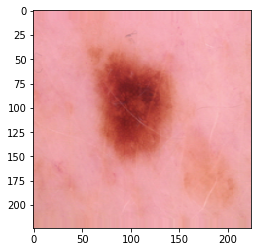

malignant


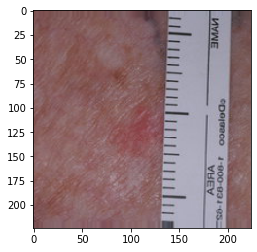

malignant


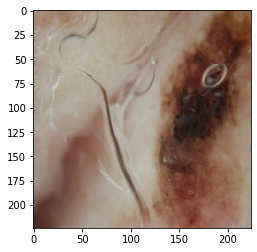

benign


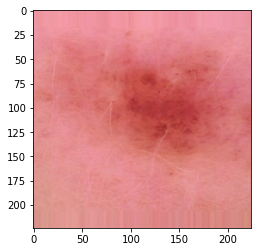

benign


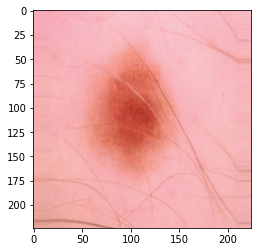

benign


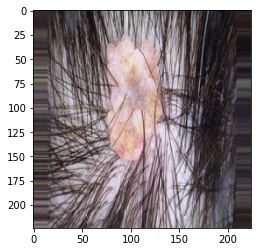

In [4]:
#Image output
training_set_images = imageses(img_width_show , img_height_show)[0]
x_batch, y_batch = next(training_set_images)
x,y = training_set_images.next()
for i in range(0,6):
    image = x[i]
    label = y[i]
    if label == 0:
        label = 'benign'
    else:
        label = 'malignant'
    print (label)
    plt.imshow(image)
    plt.show()

In [5]:
training_set,testing_set = imageses(img_width, img_height)
#class indices
training_set.class_indices

Found 2637 images belonging to 2 classes.
Found 660 images belonging to 2 classes.


{'benign': 0, 'malignant': 1}

In [6]:
def CNN( input_shape=(224,224,3)):
    # Initialising the CNN
    cnn = tf.keras.models.Sequential()
    # Convolution + Pooling Layer 
    cnn.add(tf.keras.layers.Conv2D(filters=32, kernel_size=3, activation='relu', input_shape=input_shape))
    cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))
    # Convolution + Pooling Layer 
    cnn.add(tf.keras.layers.Conv2D(filters=32, kernel_size=3, activation='relu'))
    cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))

    #  Flattening
    cnn.add(tf.keras.layers.Flatten())
    
    cnn.add(tf.keras.layers.Dense(units=128, activation='relu'))
    cnn.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))
    
    cnn.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])
    return cnn

In [7]:
def run_training(epochs=25):
    
    model = CNN(input_shape=(img_width, img_height, 3))    
    
    model.fit(x = training_set, validation_data = testing_set, epochs = 25)
    
    return model

In [8]:
def acLoss(history):
    plt.plot(history.history.history['loss'], label='Train')
    plt.plot(history.history.history['val_loss'], label='Test')
    plt.legend()
    plt.title('CNN Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.grid()
    plt.show()

In [9]:
def acPlot(history):
    plt.plot(history.history.history['accuracy'], label='Train')
    plt.plot(history.history.history['val_accuracy'], label='Test')
    plt.legend()
    plt.title('CNN Accuracy')
    plt.xlabel('Epoch - Iteration')
    plt.ylabel('Accuracy')
    plt.grid()
    plt.show()

  ...
    to  
  ['...']
  ...
    to  
  ['...']
Train for 83 steps, validate for 21 steps
Epoch 1/25
83/83 [==============================] - 11s 136ms/step - loss: 0.5729 - accuracy: 0.6936 - val_loss: 0.4889 - val_accuracy: 0.7045
Epoch 2/25
83/83 [==============================] - 10s 126ms/step - loss: 0.4762 - accuracy: 0.7584 - val_loss: 0.4313 - val_accuracy: 0.7712
Epoch 3/25
83/83 [==============================] - 11s 133ms/step - loss: 0.4282 - accuracy: 0.7842 - val_loss: 0.4674 - val_accuracy: 0.7652
Epoch 4/25
83/83 [==============================] - 10s 121ms/step - loss: 0.4468 - accuracy: 0.7816 - val_loss: 0.5300 - val_accuracy: 0.7242
Epoch 5/25
83/83 [==============================] - 10s 119ms/step - loss: 0.4335 - accuracy: 0.7986 - val_loss: 0.3897 - val_accuracy: 0.8136
Epoch 6/25
83/83 [==============================] - 11s 127ms/step - loss: 0.4086 - accuracy: 0.7986 - val_loss: 0.4247 - val_accuracy: 0.7924
Epoch 7/25
83/83 [==============================] 

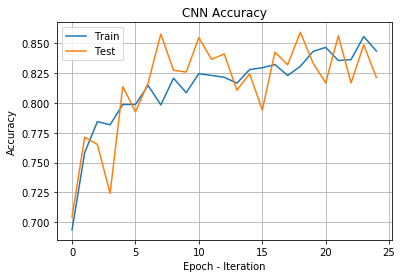

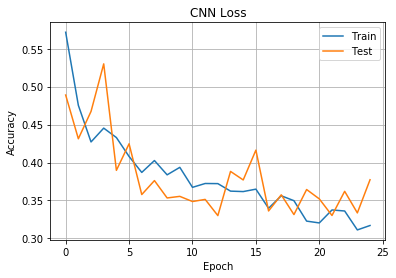

In [10]:
def main():
    history = run_training(25)
    history.summary()
    acPlot(history)
    acLoss(history)
# """ Main """
if __name__ == "__main__":
    main()